In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import openpyxl
file_path = 'hurricanes_joint_frequency.xlsx'
# df = pd.read_excel(file_path)
# print(df.head())

## 1. Data-based probability estimation


#### a. Use the hurricane data to create a joint probability table of A and P


In [5]:
hurricane_data_cleaned = pd.read_excel(file_path, header=1)

# Drop NaN and irrelevant columns/rows excel to python yay
hurricane_data_cleaned = hurricane_data_cleaned.dropna(how='all', axis=1).dropna(how='all', axis=0)

# I just want the numbers
joint_frequency_table = hurricane_data_cleaned.iloc[1:, 1:].astype(float)

# Calculate the total number of events so we can divide to go from frequency to probability
total_events = joint_frequency_table.values.sum()

# Calculate the joint probabilities
joint_probabilities = joint_frequency_table / total_events

joint_probabilities_percent = joint_probabilities * 100

# Display the percentages with rounded values for readability
joint_probabilities_percent = joint_probabilities_percent.round(2)
joint_probabilities_percent.columns = range(1, 13)
joint_probabilities_percent.head()


,1,2,3,4,5,6,7,8,9,10,11,12
1,1.82,1.82,0.00,1.82,1.82,1.82,0.00,0.00,0.00,0.00,0.00,0.00
2,1.82,1.82,0.00,1.82,1.82,1.82,3.64,3.64,1.82,1.82,1.82,0.00
3,1.82,1.82,0.00,3.64,3.64,7.27,3.64,1.82,0.00,1.82,1.82,1.82
4,1.82,1.82,1.82,1.82,3.64,0.00,1.82,0.00,1.82,0.00,0.00,0.00
5,0.00,0.00,3.64,0.00,0.00,0.00,3.64,0.00,0.00,0.00,0.00,0.00


#### b. Create a bar plot representing the marginal probability mass function of A. What is the probability of four or more major hurricanes in the Atlantic in any given year?

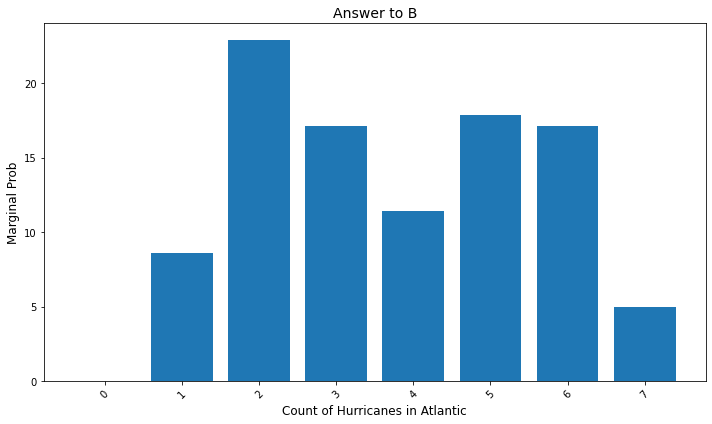

In [6]:
atlantic = pd.read_excel(file_path, header=2)
# Sum up all values in a specific row (e.g., row index 1)
row_sum = atlantic.iloc[1, 1:].sum()
# Sum all rows and create a new column with the total for each row
atlantic['Row Total'] = atlantic.iloc[:, 1:].sum(axis=1)
atlantic['Count Events'] = atlantic['Row Total']*atlantic['Atlantic']
total_events = atlantic['Count Events'].values.sum()
atlantic['Marginal Prob'] = (atlantic['Count Events']/total_events)*100
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(atlantic['Atlantic'], atlantic['Marginal Prob'])

# Add titles and labels
plt.title('Answer to B', fontsize=14)
plt.xlabel('Count of Hurricanes in Atlantic', fontsize=12)
plt.ylabel('Marginal Prob', fontsize=12)

# Show the chart
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()

In [7]:
#Part 2
prob_4_or_more = atlantic.loc[atlantic['Atlantic'] >= 4, 'Marginal Prob'].sum()

# Print the result
print(f"The marginal probability that 4 or more hurricanes happen in a year is {prob_4_or_more:.2f}%.")


The marginal probability that 4 or more hurricanes happen in a year is 51.43%.


#### c. Create a bar plot representing the marginal probability mass function of P. What is the probability of four or more major hurricanes in the Pacific in any given year?

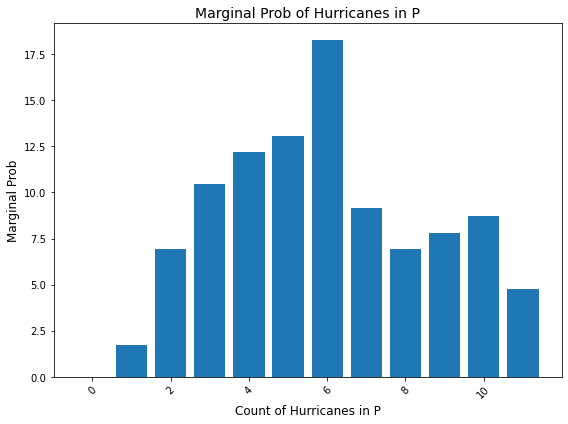

Probability of four or more major hurricanes in the Pacific in any given year '4' to '11': 80.86956521739131


In [8]:
Pacific = pd.read_excel(file_path, header=2)
column_sums = Pacific.sum(axis=0)
Pacific.loc['Total'] = column_sums
Pacific = Pacific.drop(Pacific.columns[0], axis=1)
columns_as_numbers = pd.Series(Pacific.columns, index=Pacific.columns)
Pacific.loc['Multiplied'] = Pacific.loc['Total'] * columns_as_numbers
total_events = Pacific.loc['Multiplied'].values.sum()
Pacific.loc['Marginal Prob'] = Pacific.loc['Multiplied'] / total_events *100


plt.figure(figsize=(8, 6))
plt.bar(Pacific.columns, Pacific.loc['Marginal Prob'])

# Add labels and title
plt.title('Marginal Prob of Hurricanes in P', fontsize=14)
plt.xlabel('Count of Hurricanes in P', fontsize=12)
plt.ylabel('Marginal Prob', fontsize=12)

# Display the chart
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()
#Pacific

# Calculate the summation of the "Marginal Prob" row from column "4" to "11"
start_col = 4
end_col = "11"

# Filter the columns from "4" to "11" and sum the values in the "Marginal Prob" row
marginal_sum = Pacific.loc['Marginal Prob', start_col:].sum()

print(f"Probability of four or more major hurricanes in the Pacific in any given year '{start_col}' to '{end_col}': {marginal_sum}")

### d. What is the probability there will be four or more major hurricanes in each of the Atlantic and Pacific in the same year?


In [9]:
prob_four_major_hurricanes_in_both = (marginal_sum)/100 * (prob_4_or_more)/100
print(f"Probability of four or more major hurricanes in the Pacific and Atlantic in any given year '{prob_four_major_hurricanes_in_both*100}'% ") 

Probability of four or more major hurricanes in the Pacific and Atlantic in any given year '41.59006211180125'% 


#### e. Calculate the expected value of A and the expected value of P.

In [10]:
hurricanes = np.array([0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11])  # Number of hurricanes
probabilities = np.array([0, 0.085, 0.229, 0.171, 0.114, 0.179, 0.171, 0.05,0,0,0,0])  # Marginal probabilities # had to add zero to match

expected_value = np.sum(hurricanes * probabilities)
print(f"expected value of A '{expected_value}'  ") 
hurricanes_p = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8 ,9, 10, 11])  # Number of hurricanes
probabilities_p = np.array([0.0, 0.0173913, 0.06956522, 0.10434783, 0.12173913, 0.13043478, 0.1826087, 0.09130435, 0.06956522, 0.07826087, 0.08695652, 0.04782609])  # Marginal probabilities

expected_value_p = np.sum(hurricanes_p * probabilities_p)
print(f"expected value of P '{expected_value_p}'  ") 

expected value of A '3.7830000000000004'  
expected value of P '6.0000000799999995'  


#### f. Calculate the variance and standard deviation of A and the variance and standard deviation of P. 

In [11]:
variance = np.sum(probabilities * (hurricanes - expected_value) ** 2)
standard_deviation = np.sqrt(variance)

print(f"Variance Atlantic: {variance}")
print(f"Standard Deviation Atlantic: {standard_deviation}")

Variance Atlantic: 3.119599911
Standard Deviation Atlantic: 1.76623891673805


In [12]:
variance_p = np.sum(probabilities_p * (hurricanes_p - expected_value_p) ** 2)
standard_deviation_p = np.sqrt(variance_p)

print(f"Variance P: {variance_p}")
print(f"Standard Deviation P: {standard_deviation_p}")

Variance P: 6.765217420000003
Standard Deviation P: 2.601003156476363


#### g. Calculate the covariance of A and P

In [13]:
x = hurricanes * probabilities  # Values for variable Atlantic hurricanes
y = hurricanes_p * probabilities_p  # Values for variable Pacific Hurricanes

### I guess they have to be the same length so what dimentions need better value which one?
# Step 1: Compute the means
mean_x = np.mean(x)
mean_y = np.mean(y)

# Step 2: Compute covariance
#covariance = np.mean((x - mean_x) * (y - mean_y))
cov_matrix = np.cov(x, y, bias=True)
print(f"Covariance: {cov_matrix}")

Covariance: [[0.12264202 0.04065616]
 [0.04065616 0.10231569]]


#### h. Calculate the correlation of A and P. Interpret the sign of this value.

In [14]:
# Example data
x = hurricanes * probabilities  # Values for variable Atlantic hurricanes
y = hurricanes_p * probabilities_p  # Values for variable Pacific Hurricanes

# Step 1: Compute the means
mean_x = np.mean(x)
mean_y = np.mean(y)

# Step 2: Compute the correlation
numerator = np.sum((x - mean_x) * (y - mean_y))
denominator = np.sqrt(np.sum((x - mean_x) ** 2) * np.sum((y - mean_y) ** 2))

correlation = numerator / denominator

print(f"Correlation: {correlation}")

Correlation: 0.3629406240179237


#### i. Use the data to create a conditional probability table of A, given P>4.

In [15]:
joint_frequency_array = joint_frequency_table.values.astype(int)
# Find where P > 4 (Columns corresponding to Pacific hurricanes)
P_greater_than_4 = joint_frequency_table.loc[:, joint_frequency_table.sum(axis=0) > 4]

# Calculate the joint frequency of A (Atlantic hurricanes) and P > 4
joint_freq_A_given_P_greater_than_4 = joint_frequency_table.loc[:, joint_frequency_table.sum(axis=0) > 4].sum(axis=1)

# Calculate the marginal probability of P > 4
P_P_greater_than_4 = joint_frequency_table.sum(axis=0).sum()

# Calculate conditional probability P(A | P > 4)
conditional_prob = joint_freq_A_given_P_greater_than_4 / P_P_greater_than_4

print("Conditional Probability Table of A, given P > 4:")
print(conditional_prob)
#needed for later
# sum_p_gt_4 = sum(prob for a, prob in conditional_prob.items() if a > 4)
# print(sum_p_gt_4)

Conditional Probability Table of A, given P > 4:
1    0.072727
2    0.109091
3    0.200000
4    0.109091
5    0.072727
6    0.090909
7    0.072727
8    0.018182
dtype: float64


#### j. Calculate the conditional expected value of A, given P>4.

In [16]:
# Calculate the conditional probability of A, given P > 4
conditional_prob = joint_freq_A_given_P_greater_than_4 / P_P_greater_than_4

# Calculate the conditional expected value of A, given P > 4
conditional_expected_value_A_given_P_greater_than_4 = (conditional_prob * joint_freq_A_given_P_greater_than_4.index).sum()

# Print the result
print(f"Conditional Expected Value of A, given P > 4: {conditional_expected_value_A_given_P_greater_than_4}")

Conditional Expected Value of A, given P > 4: 2.8909090909090907


#### k. Calculate the conditional variance and standard deviation of A, given P>4

In [17]:
# Calculate E(A^2 | P > 4)
conditional_expected_value_A_squared_given_P_greater_than_4 = (conditional_prob * (joint_freq_A_given_P_greater_than_4.index**2)).sum()

# Calculate conditional variance of A, given P > 4
conditional_variance_A_given_P_greater_than_4 = conditional_expected_value_A_squared_given_P_greater_than_4 - conditional_expected_value_A_given_P_greater_than_4**2

# Calculate conditional standard deviation of A, given P > 4
conditional_std_deviation_A_given_P_greater_than_4 = np.sqrt(conditional_variance_A_given_P_greater_than_4)

# Print the results
print(f"Conditional Variance of A, given P > 4: {conditional_variance_A_given_P_greater_than_4}")
print(f"Conditional Standard Deviation of A, given P > 4: {conditional_std_deviation_A_given_P_greater_than_4}")


Conditional Variance of A, given P > 4: 5.515371900826446
Conditional Standard Deviation of A, given P > 4: 2.348482893449822


#### l. Let T represent the yearly total number of Atlantic and Pacific major hurricanes. Create a bar plot representing the probability mass function of T.

0     0.018182
1     0.036364
2     0.036364
3     0.054545
4     0.054545
5     0.109091
6     0.109091
7     0.200000
8     0.109091
9     0.109091
10    0.072727
11    0.054545
12    0.018182
13    0.018182
Name: proportion, dtype: float64


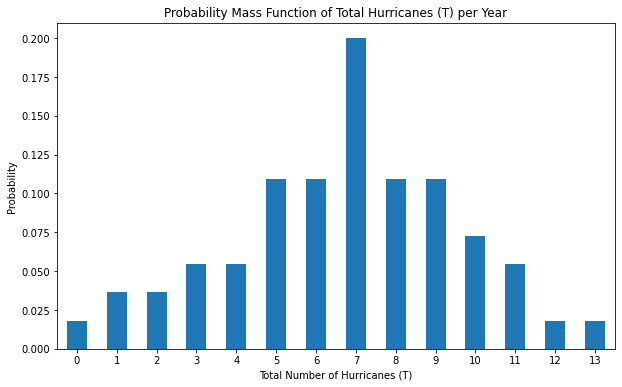

In [18]:
joint_frequency_array = joint_frequency_table.values.astype(int)

# Sum across each row for all possible combinations of Atlantic and Pacific hurricanes
total_hurricanes = []
for i in range(joint_frequency_table.shape[0]):  # Iterate over each row (Atlantic counts)
    for j in range(joint_frequency_table.shape[1]):  # Iterate over each column (Pacific counts)
        # Ensure the count is an integer for multiplication
        total_hurricanes.extend([i + j] * int(joint_frequency_table.iloc[i, j]))

# Convert to a Pandas Series for easier handling
total_hurricanes_series = pd.Series(total_hurricanes)

# Calculate the PMF (Probability Mass Function)
pmf = total_hurricanes_series.value_counts(normalize=True).sort_index()
print(pmf)

# Plot the PMF
plt.figure(figsize=(10, 6))
pmf.plot(kind='bar')
plt.title('Probability Mass Function of Total Hurricanes (T) per Year')
plt.xlabel('Total Number of Hurricanes (T)')
plt.ylabel('Probability')
plt.xticks(rotation=0)
plt.show()

#### m. Calculate the mean, variance, and standard deviation of T.

In [19]:
# Calculate mean, variance, and standard deviation
mean = total_hurricanes_series.mean()
variance = total_hurricanes_series.var()
std_deviation = total_hurricanes_series.std()

# Print the results
print(f"Mean: {mean}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_deviation}")


Mean: 6.7272727272727275
Variance: 8.276094276094275
Standard Deviation: 2.876820167492969


#### n. Calculate the probability that T>8 in any given year.

In [20]:
sum_after_8 = pmf.loc[pmf.index > 8].sum()
print(f"Probability that total hurricanes > 8: {sum_after_8*100}%")


Probability that total hurricanes > 8: 27.27272727272727%


## 2. Probability distribution function estimation:

#### a. The yearly hurricane data from each ocean represent count data, which could be modeled by a Binomial, Negative Binomial, Geometric, or Poisson distribution. According to the datagenerating processes used to derive each distribution, which of these do you think is most appropriate for modeling the hurricane data? Explain your reasoning.

#### Poisson distribution

##### Interpretation: Number of occurrences of an event with frequency l(Our case Hurricanes) over a particular interval of space or time.(Our case one Year)
##### It is Commonly used for occurrence of storms and floods.



#### b. Use the chi-square criterion to find the parameter of the Poisson distribution that best fits the data on A. Report both the chi-square value and the optimal value of the parameter. 


In [21]:
from scipy.stats import binom, nbinom, poisson
from scipy.optimize import minimize

hurricanes_a = np.array([0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11])  # Number of hurricanes
probabilities_a = np.array([0, 0.085, 0.229, 0.171, 0.114, 0.179, 0.171, 0.05,0,0,0,0])  # Marginal probabilities # had to add zero to match
count_a = np.array([5, 12, 16, 8, 4, 5, 4, 1,0,0,0,0])

data = pd.DataFrame({
    "Number_of_Hurricanes": hurricanes_a,
    "Probability": probabilities_a,
    "Count": count_a
})
# count_p = hurricanes_a = np.array([5, 4, 8, 8, 7, 6, 7, 3,2,2,2,1])
def ChiSquared(parameters, data, distribution):
    n = data['Count'].sum()  # Total number of observations
    expected_count = n * distribution.pmf(data['Number_of_Hurricanes'], parameters)  # Expected counts
    return np.sum((data['Count'] - expected_count) ** 2 / expected_count)  # Chi-squared formula

# Example usage of the ChiSquared function with an initial parameter
parameters = [2]
print(ChiSquared(parameters, data, poisson))


initial_guess = [2]  # Initial guess for lambda
result = minimize(ChiSquared, initial_guess, args=(data, poisson))
print("Optimal Lambda:", result.x)

26.9680677163492
Optimal Lambda: [2.65615374]


#### How does this parameter value compare to the expected value of A calculated in problem 1 above? 
##### expected value of A '3.7830000000000004'  the optimized value is around 1 of the expected value
#### How does this value compare to the variance of A calculated in problem 1 above? 
##### Variance Atlantic: 3.119599911 it is closer to 2.6
#### Explain why these are similar or different. Are the data on A over- or under-dispersed (i.e., spread out) relative to what would be expected of a Poisson distribution?
##### Variance is less than the mean meaning this is under-dispersed

#### c. Use the chi-square criterion to find the parameter of the Poisson distribution that best fits the data on P. Report both the chi-square value and the optimal value of the parameter. How does this value compare to the expected value of P calculated in problem 1 above? How does this value compare to the variance of P calculated in problem 1 above? Explain why these are similar or different. Are the data on P over- or under-dispersed (i.e., spread out) relative to what would be expected of a Poisson distribution?

In [22]:
from scipy.stats import binom, nbinom, poisson
from scipy.optimize import minimize

hurricanes_a = np.array([0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11])  # Number of hurricanes
#probabilities_a = np.array([0, 0.085, 0.229, 0.171, 0.114, 0.179, 0.171, 0.05,0,0,0,0])  # Marginal probabilities # had to add zero to match
count_p =  np.array([5, 4, 8, 8, 7, 6, 7, 3,2,2,2,1])

data = pd.DataFrame({
    "Number_of_Hurricanes": hurricanes_a,
    "Probability": probabilities_a,
    "Count": count_p
})
def ChiSquared(parameters, data, distribution):
    n = data['Count'].sum()  # Total number of observations
    expected_count = n * distribution.pmf(data['Number_of_Hurricanes'], parameters)  # Expected counts
    return np.sum((data['Count'] - expected_count) ** 2 / expected_count)  # Chi-squared formula

# Example usage of the ChiSquared function with an initial parameter
parameters = [2]
print(ChiSquared(parameters, data, poisson))


initial_guess = [2]  # Initial guess for lambda
result = minimize(ChiSquared, initial_guess, args=(data, poisson))
print("Optimal Lambda:", result.x)

5098.228408196303
Optimal Lambda: [4.17455118]


#### How does this parameter value compare to the expected value of P calculated in problem 1 above? 
##### expected value of A '6.0'  the optimized value is around almost exactly the expected value
#### How does this value compare to the variance of A calculated in problem 1 above? 
##### Variance Atlantic: 6.765217420000003 it is closer to very close to the value
#### Explain why these are similar or different. Are the data on A over- or under-dispersed (i.e., spread out) relative to what would be expected of a Poisson distribution?
##### Variance is more than the mean meaning this is over-dispersed

#### d. Write out the mathematical function for the Poisson probability mass function for the yearly number of major hurricanes in the Atlantic (A) using your parameter estimate from part 2b. Using this function, what is the probability of four or more major hurricanes in the Atlantic in any given ear? How does this value compare to the value calculated in problem 1 above? Explain why these are similar or different.

In [23]:
from IPython.display import display, Math
# x is number of successes
# Display the LaTeX formula for the Poisson distribution
display(Math(r"P(X = x) = \frac{(2.65)^x e^{-2.65}}{x!}, \quad k = 0, 1, 2, \ldots"))


<IPython.core.display.Math object>

In [24]:
import math
# Given parameter
lambda_ = 2.65
# Calculate P(X = x) for x = 0, 1, 2, 3
probabilities = [((lambda_ ** x) * math.exp(-lambda_)) / math.factorial(x) for x in range(4)]
# Calculate P(X <= 3)
p_leq_3 = sum(probabilities)
# Calculate P(X >= 4)
p_geq_4_a = 1 - p_leq_3 # then take the other side

print(p_geq_4_a)
#calculated value from above
print("51")

0.2749169036627157
51


#### these values are Pretty far off because the atlantic data is more binomial then a possion distribution

# Same as above but for P
#### e. Write out the mathematical formula for the Poisson probability mass function for the yearly number of major hurricanes in the Pacific (P) using your parameter estimate from part 2c. Using this function, what is the probability of four or more major hurricanes in the Pacific in any given year? How does this value compare to the value calculated in problem 1c above? Explain why these are similar or different.

In [25]:
display(Math(r"P(X = x) = \frac{(4.170)^x e^{-4.170}}{x!}, \quad k = 0, 1, 2, \ldots"))
lambda_ = 4.17
# Calculate P(X = x) for x = 0, 1, 2, 3
probabilities = [((lambda_ ** x) * math.exp(-lambda_)) / math.factorial(x) for x in range(4)]
# Calculate P(X <= 3)
p_leq_3 = sum(probabilities)
# Calculate P(X >= 4)
p_geq_4_p = 1 - p_leq_3 # then take the other side

print(p_geq_4_p)
#calculated value from above
print(marginal_sum)

<IPython.core.display.Math object>

0.5990179369073508
80.86956521739131


#### this value of off by 20% this difference is because the frequency valuse of 9 and 10 are large fro the raw data but the curve flattens this out and is not captured

#### f. Assuming independence between A and P and using your Poisson mass function formulas from parts 2 d and e, what is the probability there will be four or more major hurricanes in each of the Atlantic and Pacific in the same year? How does this value compare to the value calculated in problem 1 above? Explain why these are similar or different.

In [26]:
#### Just multiply the values together as they are independent
#Probability of four or more major hurricanes in the Pacific and Atlantic in any given year from 1d '41.59006211180125'% 
prob_both_over_4 = (p_geq_4_p)/100 * p_geq_4_a
prob_both_over_4*100

0.1646801564529969

#### '41.5'%  vs 16.4% this is a pretty big difference. Small differences get magnifed when multiplying probabilities

#### g. Assuming independence between A and P and using your Poisson mass function formulas from parts 2 d and e, what is the probability that the total number of Atlantic and Pacific majorhurricanes (T) will be greater than or equal to eight in a given year? How does this value compare to the value calculated in problem 1 above? Explain why these are similar or different.

In [27]:
# Given lambda values
lambda_1 = 4.17
lambda_2 = 2.65

# Total lambda for the combined Poisson distribution
lambda_T = lambda_1 + lambda_2# lamda is the mean basically so I think I can add them?

probabilities_T = [((lambda_T ** x) * math.exp(-lambda_T)) / math.factorial(x) for x in range(8)]

p_leq_7 = sum(probabilities_T)
# Calculate P(T >= 8)
p_geq_8 = 1 - p_leq_7

print(f"Probability that total hurricanes > 8: {p_geq_8*100}%" )

print(f"Probability that total hurricanes > 8: {sum_after_8*100}%")


Probability that total hurricanes > 8: 37.448660965032275%
Probability that total hurricanes > 8: 27.27272727272727%


##### these are pretty close the Poisson shifts things to smooth the curve

#### h. Is it reasonable to assume that, if the yearly number of major hurricanes in the Atlantic and Pacific each follow a Poisson distribution, then the total yearly number of Atlantic and Pacific major hurricanes (T) will also follow a Poisson distribution? Why or why not? If you answered ‘yes’, what would you expect to be the value of the parameter for the Poisson distribution for T? Find the parameter of the Poisson distribution that minimizes the chi-square criterion for the data on T. Report both the chi-square value and the corresponding value of the parameter. Does this parameter value match what you expected? Explain why these are similar or different

##### Yes If the peaces follow then it should follow that the sum does
##### I would add the lamdas together as I did above

In [28]:
hurricanes_a = np.array([0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13])  # Number of hurricanes
#probabilities_a = np.array([0, 0.085, 0.229, 0.171, 0.114, 0.179, 0.171, 0.05,0,0,0,0])  # Marginal probabilities # had to add zero to match
count_p = np.array([5, 4, 8, 8, 7, 6, 7, 3,2,2,2,1])
count_a = np.array([5, 12, 16, 8, 4, 5, 4, 1,0,0,0,0])

#pulled this from problem 1
pmf


data = pd.DataFrame({
    "Number_of_Hurricanes": hurricanes_a,
    #"Probability": probabilities_a,
    "Count": pmf
})

def ChiSquared(parameters, data, distribution):
    n = data['Count'].sum()  # Total number of observations
    expected_count = n * distribution.pmf(data['Number_of_Hurricanes'], parameters)  # Expected counts
    return np.sum((data['Count'] - expected_count) ** 2 / expected_count)  # Chi-squared formula

# Example usage of the ChiSquared function with an initial parameter
parameters = [3]
print(ChiSquared(parameters, data, poisson))


initial_guess = [1]  # Initial guess for lambda
result = minimize(ChiSquared, initial_guess, args=(data, poisson))
print("Optimal Lambda:", result.x)

59.0463141760747
Optimal Lambda: [6.28511988]


##### it matches! I guess you can add the possions together

#### i. Using your estimated value for the parameter of the Poisson distribution from 2h and the mathematical function for the Poisson probability mass function, what is the probability that the total number of Atlantic and Pacific major hurricanes (T) will be greater than or equal to eight in a given year?

In [29]:
lambda_T = 6.2

probabilities_T = [((lambda_T ** x) * math.exp(-lambda_T)) / math.factorial(x) for x in range(8)]

p_leq_7 = sum(probabilities_T)
# Calculate P(T >= 8)
p_geq_8 = 1 - p_leq_7

print(f"Probability that total hurricanes > 8: {p_geq_8*100}%" )

#This is really small

Probability that total hurricanes > 8: 28.398374220780532%


## 3. Overdispersion:

#### a. Find values of the parameters (r and p) of the NB distribution that minimize the chi-square criterion for the data on T. Note that r should be constrained to integer values. Report both the chi-square value and the corresponding value of the parameters. Also use these parameter values to calculate the mean and variance of the fitted NB distribution.

In [30]:
import numpy as np
import pandas as pd
from scipy.stats import binom, nbinom, poisson
from scipy.optimize import minimize

# Calculate the observed frequencies from the total_hurricanes_series
observed_freqs = total_hurricanes_series.value_counts().sort_index()

# Define the chi-square function to minimize
def chi_square(params):
    r, p = params
    if not (0 < p < 1):
        return np.inf  # Return a large value if p is out of bounds
    
    expected_freqs = []
    # Calculate expected frequencies using the Negative Binomial distribution
    for k in observed_freqs.index:
        # Calculate the expected number of occurrences for each k using the NB distribution
        expected = nbinom.pmf(k, r, p) * len(total_hurricanes_series)
        expected_freqs.append(expected)
    
    # Chi-square criterion calculation
    chi_square_value = np.sum(((observed_freqs.values - np.array(expected_freqs))**2) / np.array(expected_freqs))
    return chi_square_value

# Optimize the chi-square function over r and p
initial_guess = [5, 0.5]  # Starting point for r and p
bounds = [(1, 50), (0.01, 0.99)]  # Bounds for r (integer) and p

result = minimize(chi_square, initial_guess, bounds=bounds, method='L-BFGS-B')

# Extract the optimal r and p values
optimal_r, optimal_p = result.x
optimal_r = int(np.round(optimal_r))  # Ensure r is an integer
print(f"Optimal r: {optimal_r}, Optimal p: {optimal_p:.4f}")


Optimal r: 9, Optimal p: 0.5619


#### b. Using your estimated values of the parameters (r and p) of the NB distribution from 3a, what is the probability that the total number of Atlantic and Pacific major hurricanes (T) will be greater than or equal to eight in a given year?

In [31]:
r = optimal_r 
p = optimal_p  

# Calculate P(X >= 8), which is 1 - P(X < 8)
probability = 1 - nbinom.cdf(7, r, p)
print(f"The probability that the number of hurricanes is greater than or equal to 8 is: {probability:.4f}")


The probability that the number of hurricanes is greater than or equal to 8 is: 0.3992


#### c. Does the overdispersed Poisson (i.e., NB) provide a better fit to the data on T than the standard Poisson distribution? Explain how you know this quantitatively

##### I am going to preform a likelihood ratio test

In [41]:
data = pd.DataFrame({
    "Number_of_Hurricanes": hurricanes_a,
    "Count": pmf
})

# Define the Log-Likelihood function
def LogLikelihood(parameters, data, distribution):
    if distribution == poisson:
        # Poisson requires 1 parameter: λ (mean)
        lam = parameters[0]
        probabilities = distribution.pmf(data['Number_of_Hurricanes'], lam)
    elif distribution == nbinom:
        # Negative Binomial requires 2 parameters: r (size) and p (probability)
        r, p = parameters  # Unpack the two parameters
        probabilities = distribution.pmf(data['Number_of_Hurricanes'], r, p)
    else:
        raise ValueError("")

    # Avoid log(0) errors by replacing zero probabilities
    probabilities = np.maximum(probabilities, 1e-10)  # Replace 0s with a small value

    # Negative log-likelihood
    log_probabilities = -np.log(probabilities)
    return np.sum(data['Count'] * log_probabilities)  # Weighted sum of negative log-likelihoods

# Example parameters
poisson_params = [6]  # λ for Poisson from above this value changes based on my init
nbinom_params = [9, 0.5]  # r and p for Negative Binomial from above

# Compute Log-Likelihoods
print("Poisson Log-Likelihood:", LogLikelihood(poisson_params, data, poisson))
print("Negative Binomial Log-Likelihood:", LogLikelihood(nbinom_params, data, nbinom))

#now for the test 
#The difference in log-likelihoods quantifies how much better the NB model fits the data compared to the Poisson model.
answer = 2 * (LogLikelihood(poisson_params, data, poisson) - LogLikelihood(nbinom_params, data, nbinom))
print(answer)


Poisson Log-Likelihood: 2.5677181422110786
Negative Binomial Log-Likelihood: 2.697895212908649
-0.26035414139514046


##### the negitive value indicates that the poisson model is fit better 

#### d. Plot a bar graph of T, along with the corresponding values derived from the Poisson and overdispersed Poisson (i.e., NB) distributions. Which visually appears to fit the data better?

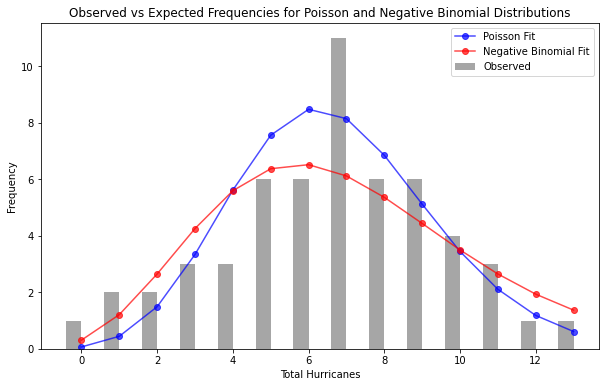

In [32]:
# Calculate the observed frequencies from the total_hurricanes_series
observed_freqs = total_hurricanes_series.value_counts().sort_index()

# Estimate the Poisson parameter (lambda) as the mean of the data
lambda_poisson = total_hurricanes_series.mean()

# Calculate expected frequencies under the Poisson distribution
expected_freqs_poisson = [poisson.pmf(k, lambda_poisson) * len(total_hurricanes_series) for k in observed_freqs.index]

# Calculate expected frequencies under the Negative Binomial distribution
expected_freqs_nb = [nbinom.pmf(k, optimal_r, optimal_p) * len(total_hurricanes_series) for k in observed_freqs.index]

# Plot the observed and expected frequencies
plt.figure(figsize=(10, 6))

# Plot the observed data as a bar plot
plt.bar(observed_freqs.index - 0.2, observed_freqs.values, width=0.4, label='Observed', color='gray', alpha=0.7)
plt.plot( expected_freqs_poisson, label='Poisson Fit', color='blue', alpha=0.7, marker='o')

# Plot the expected frequencies for Negative Binomial as a line graph
plt.plot( expected_freqs_nb, label='Negative Binomial Fit', color='red', alpha=0.7, marker='o')

# Labels and title
plt.xlabel('Total Hurricanes')
plt.ylabel('Frequency')
plt.title('Observed vs Expected Frequencies for Poisson and Negative Binomial Distributions')
plt.legend()

# Display the plot
plt.show()
